In [15]:
# 1. Data Exploration and Preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv("Alphabets_data.csv")
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [16]:
# Display basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


In [17]:
# Display the first few rows of the dataset
print(data.head())

  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  


In [18]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(data.isnull().sum())

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [19]:
# Assuming 'features' and 'target' are the column names
features = data.drop('letter', axis=1)
target = data['letter']

# Display the features and target
print(features)

       xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0         2     8      3       5      1     8    13      0      6      6   
1         5    12      3       7      2    10     5      5      4     13   
2         4    11      6       8      6    10     6      2      6     10   
3         7    11      6       6      3     5     9      4      6      4   
4         2     1      3       1      1     8     6      6      6      6   
...     ...   ...    ...     ...    ...   ...   ...    ...    ...    ...   
19995     2     2      3       3      2     7     7      7      6      6   
19996     7    10      8       8      4     4     8      6      9     12   
19997     6     9      6       7      5     6    11      3      7     11   
19998     2     3      4       2      1     8     7      2      6     10   
19999     4     9      6       6      2     9     5      3      1      8   

       x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0          10       8      0     

In [20]:
print(target)

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: letter, Length: 20000, dtype: object


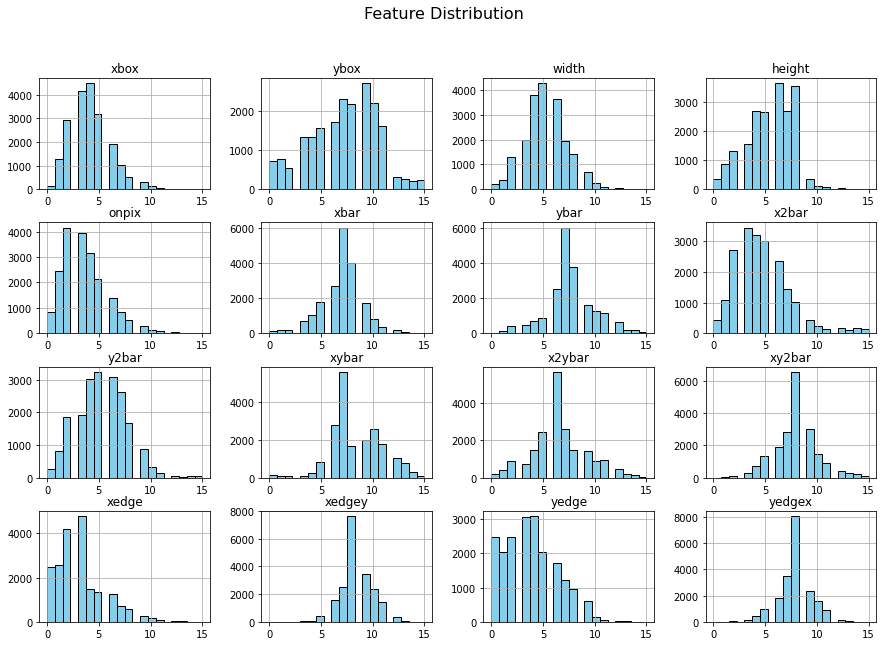

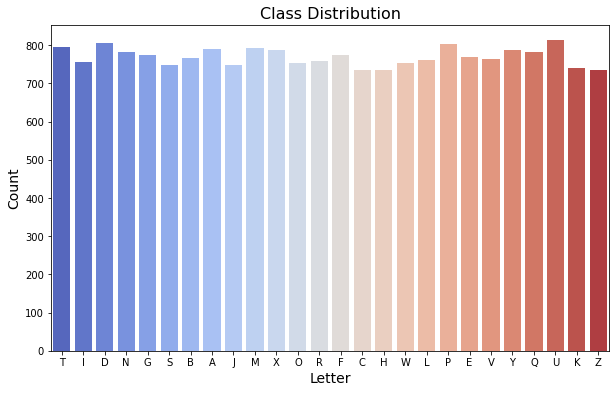

In [22]:
data.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distribution", fontsize=16)
plt.show()

# Count plot of target variable
# Use the correct name of your target column
plt.figure(figsize=(10, 6))
sns.countplot(x='letter', data=data, palette='coolwarm')  # 'letter' is the name of the target column
plt.title("Class Distribution", fontsize=16)
plt.xlabel("Letter", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

In [23]:
# Normalize the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)
features_normalized

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [24]:
# 2. Model Implementation

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([[-0.01230945, -0.01074302, -0.06048579, ..., -0.21908163,
          0.12008142,  0.12291107],
        [-0.01230945, -0.01074302,  0.43590966, ..., -0.21908163,
          0.12008142, -0.49535386],
        [-0.53500387, -0.6159833 , -0.55688123, ...,  0.42746295,
         -0.65903564, -1.11361878],
        ...,
        [-0.53500387, -0.91860345,  0.43590966, ..., -0.8656262 ,
         -0.26947711,  0.74117599],
        [-0.53500387,  0.29187713, -0.55688123, ..., -0.21908163,
         -1.04859417, -0.49535386],
        [-1.58039272, -1.22122359, -1.54967212, ..., -0.8656262 ,
         -1.4381527 , -0.49535386]]),
 array([[-0.53500387, -0.31336316, -0.06048579, ..., -0.8656262 ,
          1.288757  , -1.11361878],
        [-0.01230945,  1.19973756,  0.43590966, ...,  1.7205521 ,
          1.288757  , -1.73188371],
        [-0.53500387, -0.91860345, -0.06048579, ..., -1.51217078,
         -0.65903564,  0.12291107],
        ...,
        [ 0.51038497,  0.89711742,  0.93230511, ..., -

In [25]:
# Construct the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\lokes\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# Convert target variables to numeric type
y_train = y_train.map({'T': 1, 'L': 0, 'E': 2})  # Map 'T', 'L', and 'E' to integers
y_test = y_test.map({'T': 1, 'L': 0, 'E': 2})

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0383 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 2/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0381 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 3/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0383 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 4/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0368 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 5/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0377 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 6/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0383 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 7/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0398 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 8/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0368 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 9/

In [29]:
!pip install --upgrade scikit-learn

  Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl (11.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1


error: uninstall-no-record-file

Cannot uninstall scikit-learn 1.5.1

The package's contents are unknown: no RECORD file was found for scikit-learn.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps scikit-learn==1.5.1


In [30]:
!pip install scikeras

from sklearn.model_selection import GridSearchCV

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\lokes\\anaconda3\\lib\\site-packages\\scikit_learn-1.5.1.dist-info\\METADATA'



In [31]:
!pip install --upgrade tensorflow

In [32]:
!pip install tensorflow

In [33]:
!pip install keras

In [34]:
# 3. Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from tensorflow.keras import Sequential # Import Sequential for defining model architecture
from tensorflow.keras.layers import Dense # Import Dense layer for fully connected layers
from scikeras.wrappers import KerasClassifier  # Correct import for KerasClassifier

# Sample data (replace this with your actual data loading)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model(activation='relu', neurons=32):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)
param_grid = {
    'model__activation': ['relu', 'tanh'],  # Pass 'activation' as an argument to create_model
    'model__neurons': [32, 64, 128],  # Pass 'neurons' as an argument to create_model
    'batch_size': [10, 20],
    'epochs': [50, 100]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

C:\Users\lokes\anaconda3\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\lokes\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# 4. Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
# Use the fitted grid search object to make predictions
y_pred = grid_result.predict(X_test)
y_pred_classes = [1 if prob > 0.5 else 0 for prob in y_pred]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.82
Precision: 0.8585858585858586
Recall: 0.794392523364486
F1-score: 0.8252427184466019


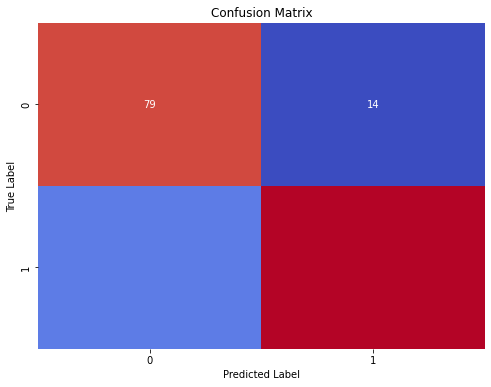

In [42]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()